In [17]:
import numpy as np  
import matplotlib.pyplot as plt
import matplotlib.animation as animation 
import random
from IPython.display import HTML

In [18]:
def euclid(data_1, data_2): 
    # menghitung jarak antar yang sakit dan yang sehat
    jarak = np.linalg.norm(data_1 - data_2)

    return jarak
    
def covid_simulation(populasi, rasio, waktu, prob, X_max, X_min, y_max, y_min, iter): 
    # set range untuk pbc
    X_range = X_max - X_min
    y_range = y_max - y_min

    # random spawn (init posisi) tiap individu dalam populasi
    x_data = np.random.randint(X_min, X_max, size=(1,populasi))
    y_data = np.random.randint(y_min, y_max, size=(1,populasi))

    # satukan posisi menjadi satu koordinat 
    pos = np.concatenate((x_data, y_data)).T

    # init status untuk setiap individu 1 = infected 0 = sehat
    infect_status = np.random.choice([0, 1], populasi, p=[(1-rasio), rasio])

    # status imunitas 0 semua awal2nya, note : yang terinfeksi imunitas = 1
    immune_status = np.copy(infect_status)

    # init waktu yang terinfeksi = waktu
    infect_time = infect_status * waktu

    # array history untuk menyimpan data setiap iterasi
    position_history = np.array([pos])
    infect_history = np.array([infect_status])

    # jumlah iterasi / waktu
    i = 0
    while (np.sum(infect_status) > 0):
        for individu in range(populasi):

            # gerak atau tidak ? 
            num = np.random.randint(1,10)
            if (num <= 8) :
                r = random.randint(1, 4)

                # right
                if r == 1: 
                    pos[individu][0] = pos[individu][0] + 1
                # kiri
                elif r == 2: 
                    pos[individu][0] = pos[individu][0] - 1
                # atas
                elif r == 3: 
                    pos[individu][1] = pos[individu][1] + 1
                # bawah
                else:
                    pos[individu][1] = pos[individu][1] - 1

                # pbc

                if pos[individu][0] > X_max : 
                    pos[individu][0] = pos[individu][0] - X_range
                
                if pos[individu][0] < X_min : 
                    pos[individu][0] = pos[individu][0] + X_range
                    
                if pos[individu][1] > y_max : 
                    pos[individu][1] = pos[individu][1] - y_range
                    
                if pos[individu][1] < y_min: 
                    pos[individu][1] = pos[individu][1] + y_range
                
            # update waktu bagi yang terinfeksi ( > 1) dikurangi 1 (sehat == 0)
            if infect_time[individu] > 1 :
                infect_time[individu] = infect_time[individu] -  1

            # jika hari terakhir terinfeksi ( == 1)
            elif infect_time[individu] == 1 : 
                # waktu reset 
                infect_time[individu] = 0
                # status sehat
                infect_status[individu] = 0
        
        # cek posisi setiap individu, apakah bersentuhan dengan yang positif ?
        for p in range(populasi):
            # untuk setiap individu dibandingkan dengan array yang hanya terinfeksi
            for j in range(pos[np.argwhere(infect_status == 1)[:,0]].shape[0]):
                # jika individu bertemu dengan individu positif dan imunitas dari individu == 0 maka..
                if ((euclid(pos[p], pos[np.argwhere(infect_status == 1)[:,0]][j]) == 0) and (immune_status[p] == 0)):
                    # individu terinfeksi, update status
                    infect_time[p] = waktu
                    immune_status[p] = 1
                    infect_status[p] = 1
            

        # endloop 

        # update array history
        position_history = np.concatenate((position_history, [pos]))
        infect_history = np.concatenate((infect_history, [infect_status]))
        i += 1


    return position_history, infect_history, np.array([x for x in range(i)])


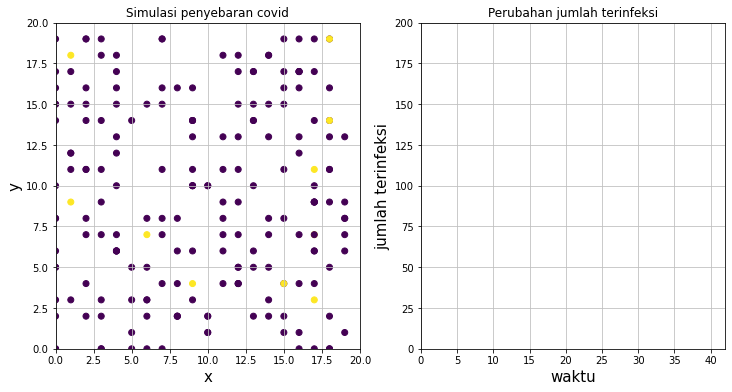

In [19]:
if __name__ == '__main__':

    # init variable scalar
    populasi = 200
    rasio = 0.05
    waktu = 10
    X_max, X_min, y_max, y_min = 20, 0, 20, 0 
    prob = 0.8

    # pemanggilan metod covid_simulation
    data, infect_history, time = covid_simulation(populasi, rasio, waktu, prob, X_max, X_min, y_max, y_min, iter)
    infect_sum = np.array([np.sum(infect_history[x]) for x in range(time.shape[0])])


    # animasi 
    def update_plot(i, fig, scat, data, infect_history, line, infect_sum, time):
        
        # covid simulation 
        scat.set_offsets((data[i]))
        scat.set_array(infect_history[i])

        # infected simulation 
        line.set_data(time[0:i], infect_sum[0:i])
    
    # init plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

    ax1.set_title('Simulasi penyebaran covid')
    ax1.grid(True, linestyle = '-', color = '0.75')
    ax1.set_xlim([X_min, X_max])
    ax1.set_ylim([y_min, y_max])
    ax1.set_xlabel('x', fontsize=15)
    ax1.set_ylabel('y', fontsize=15)
    
    
    scat = ax1.scatter(data[0][:,0], data[0][:,1], c=infect_history[0])

    ax2.set_title('Perubahan jumlah terinfeksi')
    ax2.grid(True, linestyle = '-', color = '0.75')
    ax2.set_xlim((0, time[-1]))
    ax2.set_ylim((0, populasi))
    ax2.set_xlabel('waktu', fontsize=15)
    ax2.set_ylabel('jumlah terinfeksi', fontsize=15)
    line, = ax2.plot(time[0:0], infect_sum[0:0])
    

    anim = animation.FuncAnimation(fig, update_plot, fargs = (fig, scat, data, infect_history, line, infect_sum, time), frames = time ,interval = 100 , blit=False)

    anim.save('simulasi-covid.mp4', writer='ffmpeg')

    
    #INIT PLOT result plot ada di bawah

In [20]:
from matplotlib import animation, rc

rc('animation', html='jshtml')
anim

In [21]:
# play mp4 local
HTML("""
    <video alt="test" controls>
        <source src="./simulasi-covid.mp4" type="video/mp4">
    </video>
    """)